<a href="https://colab.research.google.com/github/SaiVamshiKatkuri/MLnow_2.0/blob/main/3_1_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic**: `Univariate Linear Regression`

[Link to download the Dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Date Created** :June 6,2021

**AUTHOR**: Sai Vamshi Katkuri
[Assessment Repository](https://github.com/SaiVamshiKatkuri/MLnow_2.0)

**Reach out** :[Email](https://mail.google.com/mail/u/0/?tab=rm&ogbl#inbox) | [Linkedin](https://www.linkedin.com/in/katkuri-sai-vamshi-2209281a8/) | [Github](https://github.com/SaiVamshiKatkuri)

**Changes** : Used Simple Linear Regression as well as Support Vector Machines




## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd '/content/drive/MyDrive/Datasets'

/content/drive/MyDrive/Datasets


In [3]:
ls

student-mat.csv  student-por.csv  univariate_MathData_2.csv  w-h.csv


In [4]:
import os

In [5]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [6]:
mathData = pd.read_csv('student-mat.csv', sep=';') #load the csv file as dataframe

In [7]:
mathData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


We are just going to consider the columns `G1` and `G3` for univariate linear regression

$G3_i = G1_i  \cdot \theta_1 + \theta_0$

In [8]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [9]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [10]:
ls

student-mat.csv  student-por.csv  univariate_MathData_2.csv  w-h.csv


## Data visualization

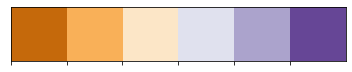

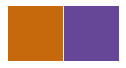

In [11]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [12]:
uniMathData.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

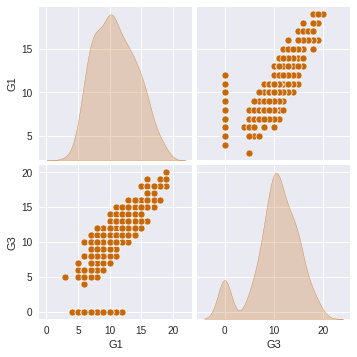

In [13]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

## Data Splits

In [14]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [15]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [16]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [17]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [79]:
print(trainLabels.describe())

count    316.000000
mean      10.303797
std        4.575586
min        0.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G3, dtype: float64


In [18]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [35]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [36]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [37]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 0s 17ms/step - loss: 18.1256 - mae: 18.1256 - mse: 372.1845 - val_loss: 19.1212 - val_mae: 19.1212 - val_mse: 412.0621
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 18.0077 - mae: 18.0077 - mse: 367.4999 - val_loss: 18.9971 - val_mae: 18.9971 - val_mse: 406.8950
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 17.8899 - mae: 17.8899 - mse: 362.8549 - val_loss: 18.8728 - val_mae: 18.8728 - val_mse: 401.7568
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 17.7727 - mae: 17.7727 - mse: 358.2838 - val_loss: 18.7481 - val_mae: 18.7481 - val_mse: 396.6334
Epoch 5/300
10/10 [==============================] - 0s 4ms/step - loss: 17.6558 - mae: 17.6558 - mse: 353.8352 - val_loss: 18.6231 - val_mae: 18.6231 - val_mse: 391.5292
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 17.5374 - mae: 17.5374 - mse: 349.2525 - val_loss: 18.4988 - val_mae: 1

In [38]:
print(history)

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


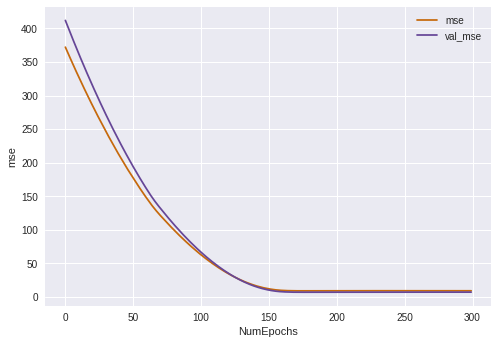

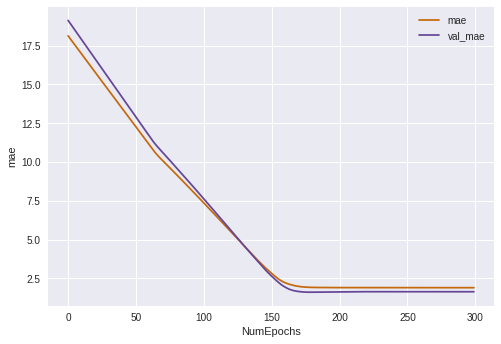

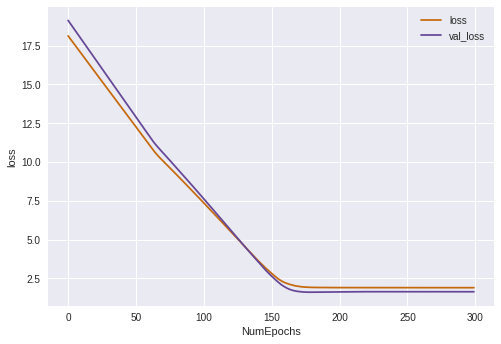

In [40]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [41]:
model.predict([1])

array([[2.3306983]], dtype=float32)

In [42]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[2.3306983]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[2.3306983]
 [3.2094862]
 [4.0882745]
 [4.9670625]
 [5.8458505]]

List of Predictions (flattened out):
[2.3306983 3.2094862 4.0882745 4.9670625 5.8458505]



In [43]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [44]:
testPreds = model.predict(testFeatures)
testPreds_Array=testPreds.flatten() #array of all prediction values

In [45]:
print(len(testPreds_Array))
print(testPreds_Array)

79
[13.754943   6.7246385 11.118579  16.391308  16.391308  11.997367
 13.754943  18.148884  18.148884   8.482215  13.754943  12.876155
  8.482215   7.6034265  9.361003  12.876155  11.118579  15.512519
  7.6034265 10.239791  14.633731  12.876155  13.754943  15.512519
  7.6034265  7.6034265  8.482215  10.239791  11.997367  10.239791
 11.997367  12.876155  10.239791   6.7246385  9.361003  11.997367
  7.6034265  8.482215  13.754943   9.361003   9.361003   7.6034265
 11.997367   6.7246385 12.876155   7.6034265  7.6034265 11.118579
 12.876155  16.391308  11.997367  14.633731   9.361003  11.997367
 14.633731  11.997367  14.633731  11.997367  14.633731  11.118579
 11.997367   8.482215  15.512519   7.6034265 15.512519  11.118579
 15.512519  12.876155   8.482215   8.482215  11.997367  17.270096
 12.876155  15.512519  10.239791   7.6034265 10.239791   7.6034265
 11.118579 ]


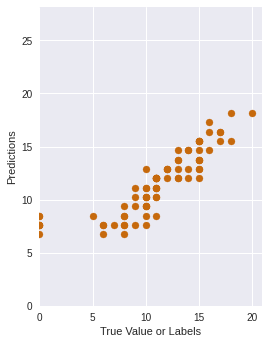

In [46]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds_Array)

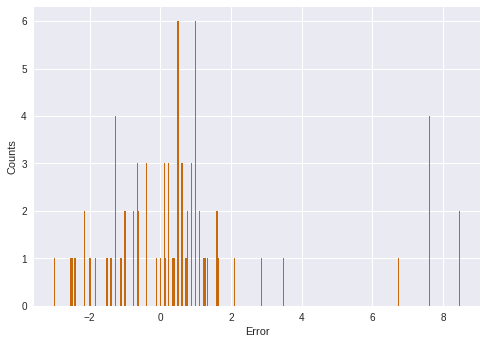

In [47]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds_Array, testLabels, numEpochs)

Note: 


Validation loss `val_loss` is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

- Hyperparameter tuning --> `numEpochs`, `optimizer`, `learning_rate`, lossFunctions

# Using Other models on the dataset

## Simple Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(trainFeatures, trainLabels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
testPreds_LR = regressor.predict(testFeatures)
testPreds_LR_Array=testPreds_LR.flatten()   #Flattening to 1d array

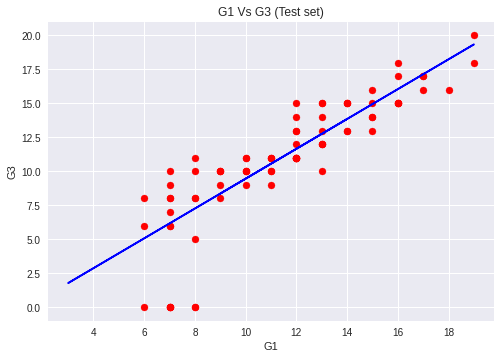

In [68]:
plt.grid(True)
plt.scatter(testFeatures, testLabels, color = 'red')
plt.plot(trainFeatures, regressor.predict(trainFeatures), color = 'blue')
plt.title('G1 Vs G3 (Test set)')
plt.xlabel('G1')
plt.ylabel('G3')
plt.show()

#Support Vector Machine

In [64]:
from sklearn.svm import SVR
SVM_regressor = SVR(kernel = 'rbf')
SVM_regressor.fit(trainFeatures, trainLabels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [72]:
testPreds_SVM=SVM_regressor.predict(testFeatures)
testPreds_SVM_Array=testPreds_SVM.flatten()

In [73]:
CompareModels_df=pd.DataFrame({'testLabels':testLabels,'testPreds':testPreds_Array,'testPreds_LR':testPreds_LR_Array,'testPreds_SVM':testPreds_SVM_Array})
print(CompareModels_df.head(15))

    testLabels  testPreds  testPreds_LR  testPreds_SVM
9           15  13.754943     13.850873      13.841499
25           8   6.724638      5.068301       6.099613
28          11  11.118579     10.557408      10.900065
31          17  16.391308     17.144337      17.308386
32          16  16.391308     17.144337      17.308386
38          11  11.997367     11.655230      11.922990
39          13  13.754943     13.850873      13.841499
42          18  18.148884     19.339980      17.531246
47          20  18.148884     19.339980      17.531246
53          11   8.482215      7.263944       8.162019
57          15  13.754943     13.850873      13.841499
70          15  12.876155     12.753051      12.900435
72           5   8.482215      7.263944       8.162019
82           6   7.603426      6.166122       7.057937
84          10   9.361003      8.361765       9.100437


In [78]:
Errors_df=pd.DataFrame({'PerceptronError':abs(testLabels-testPreds_Array),'LR_Error':abs(testLabels-testPreds_LR_Array),'SVM_Error':abs(testLabels-testPreds_SVM_Array)})
print(Errors_df.head(15))

    PerceptronError  LR_Error  SVM_Error
9          1.245057  1.149127   1.158501
25         1.275362  2.931699   1.900387
28         0.118579  0.442592   0.099935
31         0.608692  0.144337   0.308386
32         0.391308  1.144337   1.308386
38         0.997367  0.655230   0.922990
39         0.754943  0.850873   0.841499
42         0.148884  1.339980   0.468754
47         1.851116  0.660020   2.468754
53         2.517785  3.736056   2.837981
57         1.245057  1.149127   1.158501
70         2.123845  2.246949   2.099565
72         3.482215  2.263944   3.162019
82         1.603426  0.166122   1.057937
84         0.638997  1.638235   0.899563
